<a href="https://colab.research.google.com/github/harrsshhs/Financial_Wellness_Survey.ipynb/blob/main/Financial_Wellness_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Preferences and Financial Wellness Survey**

### The Customer Preferences and Financial Wellness Survey aims to understand individuals' attitudes, behaviors, and preferences related to financial well-being. The survey covers various aspects such as financial habits, savings, investment preferences, retirement planning, awareness of financial products and services, perceptions of financial stability, and factors influencing financial decision-making. The survey seeks to gather insights into how individuals perceive their financial health, their level of financial literacy, their financial goals and priorities, and their satisfaction with financial products and services available to them. The data collected from this survey can provide valuable information for financial institutions, policymakers, and researchers to improve financial education, develop tailored financial products, and enhance overall financial well-being in the community.

**Mounting Google Drive for instant access of data from the cloud.**

In [ ]:
#MOUNTING GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Executing this module to import files from drive
from google.colab import files

### Importing basic libraries for the analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the Excel file into a pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/Response.xlsx')

# Displaying the first few rows of the DataFrame
df.head()

,Name,Age,Annual Income,Annual Savings,Place of origin,Gender,Highest Education,How aware are you of the different health insurance plans available in the market?,To what extent do you understand the coverage and benefits offered by health insurance plans?,How often do you compare different health insurance plans before making a decision?,...,How supportive do you find your family and friends in financial matters?,How important is moral and emotional support from your family and friends?,"Have you received practical assistance (e.g., loans, gifts) from family or friends during financial difficulties?",Do you have a dedicated plan or strategy in place to cover unexpected medical expenses?,"How confident are you in your ability to handle other unexpected expenses (e.g., car repairs, home maintenance)?",What age do you plan to retire at?,How do you envision your lifestyle after retirement?,Have you calculated your retirement savings goal based on your expected post-retirement lifestyle?,How important is it for you to have a retirement income that covers your desired lifestyle?,Do you have any specific plans or aspirations for activities or projects post-retirement?
0,Akshay,35,5-7 LPA,30-50%,Odisha,Male,Undergraduate,4,3,2,...,4,2,3,2,4,3,4,2,3,4
1,Priya,47,0-5 LPA,0-10%,Maharashtra,Female,Postgraduate,3,4,5,...,3,5,4,5,3,4,3,5,4,3
2,Somnath,33,15 LPA & above,More than 70%,Karnataka,Male,Non-graduate,5,2,3,...,5,3,2,3,5,2,5,3,2,5
3,Nisha,52,7-10 LPA,10-30%,Delhi,Female,Doctorate and above,2,5,4,...,2,4,5,4,2,5,2,4,5,2
4,Rohit,38,10-15 LPA,30-50%,Bihar,Male,Undergraduate,4,3,2,...,4,2,3,2,4,3,4,2,3,4


### By using info function, we can get the details of the dataset as per the attributes.
Here, Name, Annual income, annual savings, place of origin, gender and highest education are categorical values.
The rest are non-categorical values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 38 columns):
 #   Column                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                             --------------  ----- 
 0   Name                                                                                                               50 non-null     object
 1   Age                                                                                                                50 non-null     int64 
 2   Annual Income                                                                                                      50 non-null     object
 3   Annual Savings                                                                                                     50 non-null     object
 4   Place of origin                   

### Shortening the column names for better analysis

In [ ]:
# Shortening the column names to meaningful terms
new_column_names = {
    'How aware are you of the different health insurance plans available in the market?': 'Health Insurance Awareness',
    'To what extent do you understand the coverage and benefits offered by health insurance plans?': 'Health Insurance Understanding',
    'How often do you compare different health insurance plans before making a decision?': 'Health Insurance Comparison Frequency',
    'How important is it for you that a health insurance plan covers preventive healthcare options?': 'Preventive Healthcare Coverage Importance',
    'How familiar are you with retirement savings plans such as 401(k), IRA, or pension schemes?': 'Retirement Savings Familiarity',
    'Have you started planning or saving for your retirement?': 'Retirement Planning Start',
    'How confident are you in your understanding of retirement planning options?': 'Retirement Planning Confidence',
    'How important is it for you to have a secure retirement income?': 'Secure Retirement Income Importance',
    'Are you aware of government initiatives or policies related to healthcare and retirement benefits?': 'Government Initiatives Awareness',
    'How informed do you feel about the social security system and other public schemes?': 'Social Security Awareness',
    'Have you ever utilized or considered utilizing any public policies for healthcare or retirement?': 'Public Policy Utilization',
    'How important is it for you that public policies provide adequate support for healthcare and retirement?': 'Public Policy Support Importance',
    'How important is maintaining good health and well-being to you?': 'Health Importance',
    'How proactive are you in seeking preventive healthcare options such as regular check-ups, vaccinations, etc.?': 'Proactive Healthcare Seeking',
    'What barriers, if any, do you face in accessing healthcare services?': 'Healthcare Access Barriers',
    'How satisfied are you with the current healthcare options available to you?': 'Healthcare Satisfaction',
    'How would you rate your current financial situation?': 'Financial Situation Rating',
    'How do you prioritize your expenses?': 'Expense Prioritization',
    'How often do you review and adjust your budget or financial plan?': 'Budget Review Frequency',
    'Have you experienced any significant unplanned expenses in the past year?': 'Unplanned Expenses Experience',
    'How confident are you in your ability to manage unexpected financial burdens?': 'Financial Burdens Management Confidence',
    'How supportive do you find your family and friends in financial matters?': 'Family and Friends Financial Support',
    'How important is moral and emotional support from your family and friends?': 'Family and Friends Support Importance',
    'Have you received practical assistance (e.g., loans, gifts) from family or friends during financial difficulties?': 'Family and Friends Practical Assistance',
    'Do you have a dedicated plan or strategy in place to cover unexpected medical expenses?': 'Medical Expenses Plan',
    'How confident are you in your ability to handle other unexpected expenses (e.g., car repairs, home maintenance)?': 'Unexpected Expenses Management Confidence',
    'What age do you plan to retire at?': 'Retirement Age Plan',
    'How do you envision your lifestyle after retirement?': 'Post-Retirement Lifestyle Vision',
    'Have you calculated your retirement savings goal based on your expected post-retirement lifestyle?': 'Retirement Savings Goal Calculation',
    'How important is it for you to have a retirement income that covers your desired lifestyle?': 'Retirement Income Importance',
    'Do you have any specific plans or aspirations for activities or projects post-retirement?': 'Post-Retirement Plans and Aspirations'
}

# Renaming the columns in the DataFrame
df.rename(columns=new_column_names, inplace=True)

# Displaying the updated DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Name                                       50 non-null     object
 1   Age                                        50 non-null     int64 
 2   Annual Income                              50 non-null     object
 3   Annual Savings                             50 non-null     object
 4   Place of origin                            50 non-null     object
 5   Gender                                     50 non-null     object
 6   Highest Education                          50 non-null     object
 7   Health Insurance Awareness                 50 non-null     int64 
 8   Health Insurance Understanding             50 non-null     int64 
 9   Health Insurance Comparison Frequency      50 non-null     int64 
 10  Preventive Healthcare Coverage Importanc

In [ ]:
"""from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticating and create PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Creating a DataFrame
data = pd.DataFrame(df)

# Defining the file name for the Excel file
file_name = 'Clean_Data.xlsx'

# Exporting the DataFrame to Excel
df.to_excel(file_name, index=False)

# Uploading the file to Google Drive
file = drive.CreateFile({'title': file_name})
file.SetContentFile(file_name)
file.Upload()

# Printing the link to the uploaded file
print('File uploaded successfully:', file['alternateLink'])


SyntaxError: incomplete input (<ipython-input-7-b77788a6e509>, line 1)

### Differentiating between categorical and non-categorical values

In [ ]:
# Storing the data types for each attribute in a variable column_types
column_types = df.dtypes

# Separating categorical and non-categorical columns
categorical_columns = column_types[column_types == 'object'].index.tolist()
non_categorical_columns = column_types[column_types != 'object'].index.tolist()

print("Categorical Columns:")
for column in categorical_columns:
    print(column)

print("\nNon-Categorical Columns:")
for column in non_categorical_columns:
    print(column)

Categorical Columns:
Name
Annual Income
Annual Savings
Place of origin
Gender
Highest Education

Non-Categorical Columns:
Age
Health Insurance Awareness
Health Insurance Understanding
Health Insurance Comparison Frequency
Preventive Healthcare Coverage Importance
Retirement Savings Familiarity
Retirement Planning Start
Retirement Planning Confidence
Secure Retirement Income Importance
Government Initiatives Awareness
Social Security Awareness
Public Policy Utilization
Public Policy Support Importance
Health Importance
Proactive Healthcare Seeking
Healthcare Access Barriers
Healthcare Satisfaction
Financial Situation Rating
Expense Prioritization
Budget Review Frequency
Unplanned Expenses Experience
Financial Burdens Management Confidence
Family and Friends Financial Support
Family and Friends Support Importance
Family and Friends Practical Assistance
Medical Expenses Plan
Unexpected Expenses Management Confidence
Retirement Age Plan
Post-Retirement Lifestyle Vision
Retirement Savings G

### Showing the description of the data including all the methods of statistical analysis.

In [ ]:
# Descriptive statistics for the given dataset including all
df.describe(include = "all")

,Name,Age,Annual Income,Annual Savings,Place of origin,Gender,Highest Education,Health Insurance Awareness,Health Insurance Understanding,Health Insurance Comparison Frequency,...,Family and Friends Financial Support,Family and Friends Support Importance,Family and Friends Practical Assistance,Medical Expenses Plan,Unexpected Expenses Management Confidence,Retirement Age Plan,Post-Retirement Lifestyle Vision,Retirement Savings Goal Calculation,Retirement Income Importance,Post-Retirement Plans and Aspirations
count,50,50.000000,50,50,50,50,50,50.000000,50.0000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,49,NaN,5,5,30,2,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Vivek,NaN,0-5 LPA,0-10%,Odisha,Male,Postgraduate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,12,11,7,28,14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,44.360000,NaN,NaN,NaN,NaN,NaN,3.500000,3.5400,3.500000,...,3.500000,3.500000,3.500000,3.540000,3.500000,3.500000,3.500000,3.540000,3.500000,3.500000
std,NaN,8.677346,NaN,NaN,NaN,NaN,NaN,1.111168,1.0919,1.147313,...,1.111168,1.147313,1.111168,1.128662,1.111168,1.111168,1.111168,1.128662,1.111168,1.111168
min,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,2.000000,2.0000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,3.000000,3.0000,2.250000,...,3.000000,2.250000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,3.500000,4.0000,3.500000,...,3.500000,3.500000,3.500000,4.000000,3.500000,3.500000,3.500000,4.000000,3.500000,3.500000
75%,NaN,51.750000,NaN,NaN,NaN,NaN,NaN,4.000000,4.0000,4.750000,...,4.000000,4.750000,4.000000,4.750000,4.000000,4.000000,4.000000,4.750000,4.000000,4.000000


### Below is the countplot to show the distribution of the genders, where 28 are males and 22 are females.

<ipython-input-10-3689d9ac707d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette=colors)


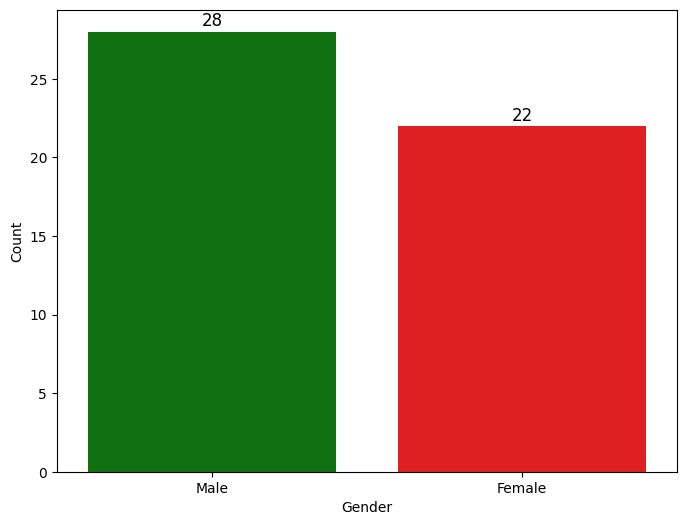

In [ ]:
# Defining colors for the genders
colors=['green','red']

# Count Plot of the gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette=colors)
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotating the counts per gender
for index, value in enumerate(df['Gender'].value_counts()):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)
plt.show()

### Visualizing the age group from the responses.

<ipython-input-11-621696d1ea86>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age Group', palette=colors)


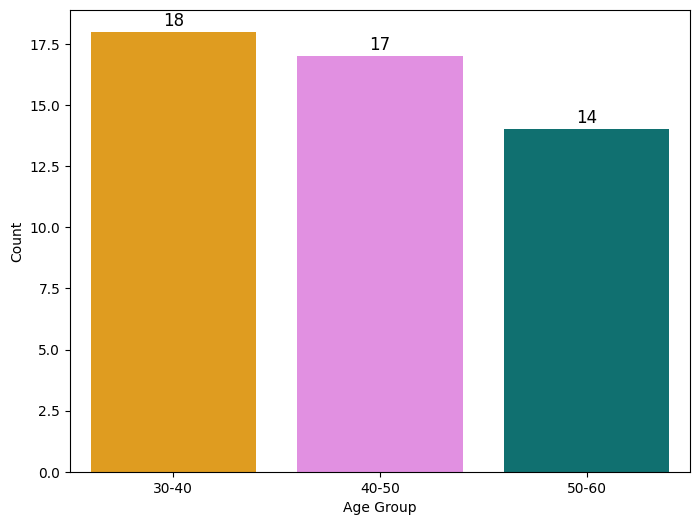

In [ ]:
# Defining bins and labels for age groups
bins = [30, 40, 50, 60]
labels = ['30-40', '40-50', '50-60']

# Creating a new column 'Age Group' based on the 'Age' column and the defined bins and labels
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Defining colors for the count plot bars
colors = ['orange', 'violet', 'teal']

# Creating a count plot to visualize the distribution of age groups
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age Group', palette=colors)
plt.xlabel('Age Group')
plt.ylabel('Count')

# Adding text labels on top of each bar to show the count
for index, value in enumerate(df['Age Group'].value_counts()):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

### Visualizing the annual income by the respondents in a pie chart.

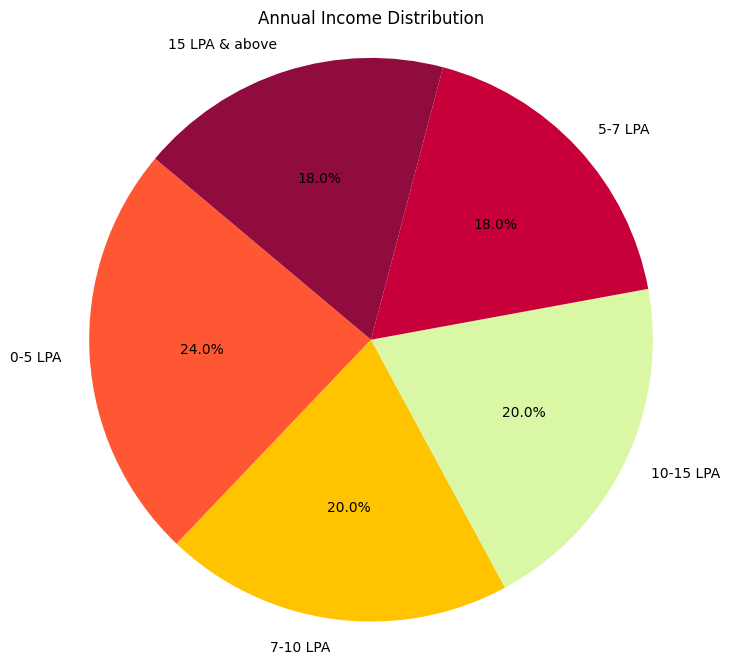

In [ ]:
# Getting the count of each category in the 'Annual Income' column
earning_counts = df['Annual Income'].value_counts()

# Plotting the pie chart for annual income distribution
plt.figure(figsize=(8, 8))

# Defining colors for the pie chart segments
colors = ['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F']

# Plotting the pie chart with percentages and custom colors
plt.pie(earning_counts, labels=earning_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Adding title and make the aspect ratio equal to avoid distortion
plt.title('Annual Income Distribution')
plt.axis('equal')

# Show the pie chart
plt.show()

### Visualizing annual savings by the respondents.

<ipython-input-13-81466642eeef>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=savings_counts.index, y=savings_counts.values, palette=colors)


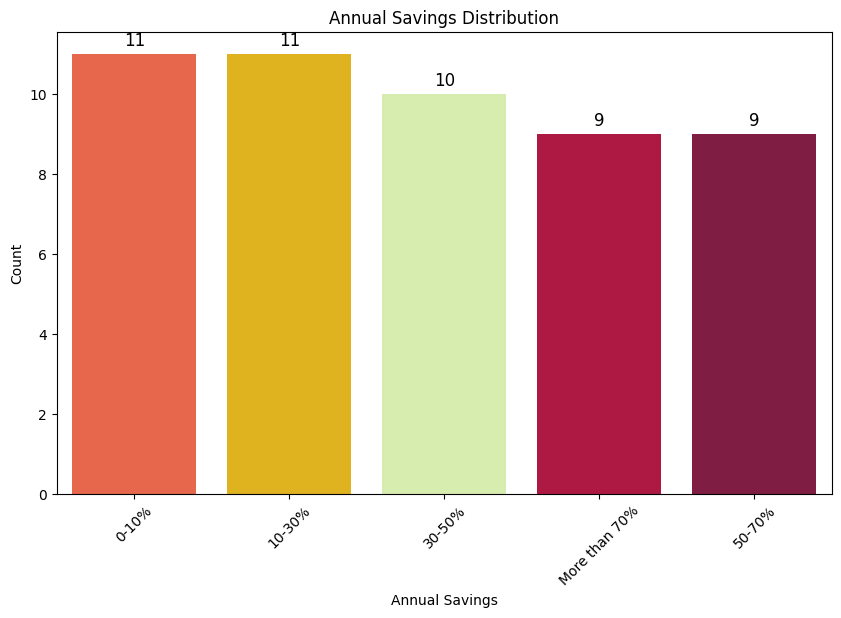

In [ ]:
# Getting the count of each category in the 'Annual Savings' column
savings_counts = df['Annual Savings'].value_counts()

# Defining colors for the bar plot
colors = ['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F']

# Plotting the bar chart for annual savings distribution
plt.figure(figsize=(10, 6))

# Using seaborn to create the bar plot with custom colors
sns.barplot(x=savings_counts.index, y=savings_counts.values, palette=colors)

# Adding labels and title to the plot
plt.xlabel('Annual Savings')
plt.ylabel('Count')
plt.title('Annual Savings Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding text labels on top of each bar to show the count
for index, value in enumerate(savings_counts.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

### Visulaizing the education level distribution using a pie chart.

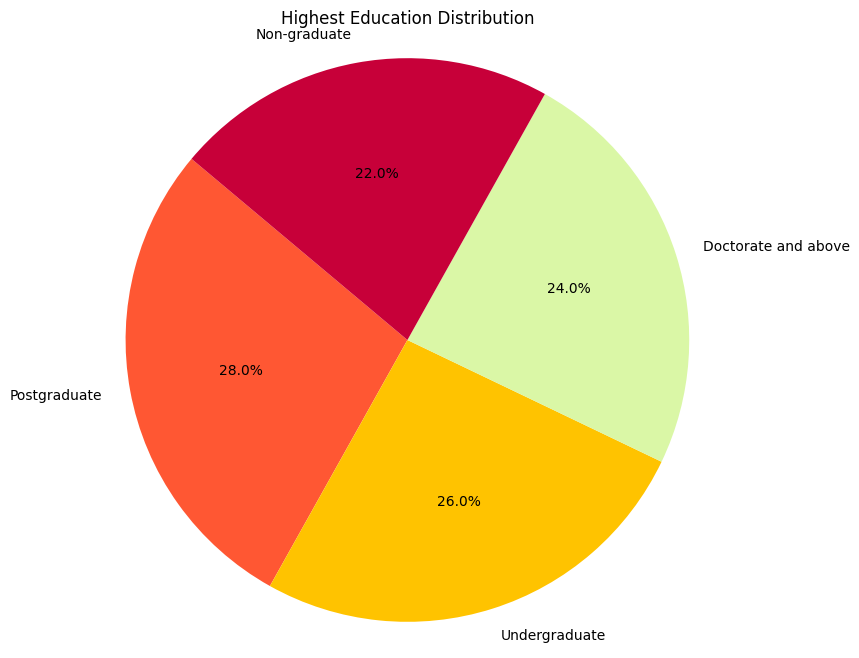

In [ ]:
# Getting the count of each category in the 'Highest Education' column
education_counts = df['Highest Education'].value_counts()

# Plotting the pie chart for highest education distribution
plt.figure(figsize=(8, 8))

# Defining colors for the pie chart segments
colors = ['#FF5733', '#FFC300', '#DAF7A6', '#C70039']

# Plotting the pie chart with percentages and custom colors
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Adding title and make the aspect ratio equal to avoid distortion
plt.title('Highest Education Distribution')
plt.axis('equal')

# Show the pie chart
plt.show()


### Displaying the responses recorded accross the states from India on a map using Folium library.

In [ ]:
# Getting the count of each category in the 'Place of origin' column and reset the index
place_counts = df['Place of origin'].value_counts().reset_index()

# Renaming the columns to 'Place of origin' and 'Count' for better readability
place_counts.columns = ['Place of origin', 'Count']

# Displaying the counts of each place of origin
place_counts

,Place of origin,Count
0,Odisha,7
1,West Bengal,4
2,Karnataka,3
3,Bihar,3
4,Maharashtra,3
5,Chhattisgarh,3
6,Delhi,2
7,Tamil Nadu,2
8,Telangana,2
9,Mizoram,1



### Now lets see the responses via India map that is generated using the Folium library

In [ ]:
# Importing Folium library for geospatial analysis
import folium

# Defining the coordinates for each state in India
state_coordinates = {
    'Andaman and Nicobar Islands': (11.7401, 92.6586),
    'Andhra Pradesh': (15.9129, 79.7400),
    'Arunachal Pradesh': (28.2180, 94.7278),
    'Assam': (26.2006, 92.9376),
    'Bihar': (25.0961, 85.3131),
    'Chandigarh': (30.7333, 76.7794),
    'Chhattisgarh': (21.2787, 81.8661),
    'Dadra and Nagar Haveli': (20.1809, 73.0169),
    'Daman and Diu': (20.4283, 72.8397),
    'Delhi': (28.7041, 77.1025),
    'Goa': (15.2993, 74.1240),
    'Gujarat': (22.2587, 71.1924),
    'Haryana': (29.0588, 76.0856),
    'Himachal Pradesh': (31.1048, 77.1734),
    'Jammu and Kashmir': (33.7782, 76.5762),
    'Jharkhand': (23.6102, 85.2799),
    'Karnataka': (15.3173, 75.7139),
    'Kerala': (10.8505, 76.2711),
    'Ladakh': (34.1526, 77.5770),
    'Lakshadweep': (10.5667, 72.6417),
    'Madhya Pradesh': (22.9734, 78.6569),
    'Maharashtra': (19.7515, 75.7139),
    'Manipur': (24.6637, 93.9063),
    'Meghalaya': (25.4670, 91.3662),
    'Mizoram': (23.1645, 92.9376),
    'Nagaland': (26.1584, 94.5624),
    'Odisha': (20.9517, 85.0985),
    'Puducherry': (11.9416, 79.8083),
    'Punjab': (31.1471, 75.3412),
    'Rajasthan': (27.0238, 74.2179),
    'Sikkim': (27.5330, 88.5122),
    'Tamil Nadu': (11.1271, 78.6569),
    'Telangana': (17.1232, 79.2088),
    'Tripura': (23.9408, 91.9882),
    'Uttar Pradesh': (26.8467, 80.9462),
    'Uttarakhand': (30.0668, 79.0193),
    'West Bengal': (22.9868, 87.8550)
}

# Defining colors for each state in the map
state_colors = {
    'Andaman and Nicobar Islands': '#FF5733',
    'Andhra Pradesh': '#FFC300',
    'Arunachal Pradesh': '#DAF7A6',
    'Assam': '#C70039',
    'Bihar': '#900C3F',
    'Chandigarh': '#00FFFF',
    'Chhattisgarh': '#7FFFD4',
    'Dadra and Nagar Haveli': '#FF5733',
    'Daman and Diu': '#FFC300',
    'Delhi': '#DAF7A6',
    'Goa': '#C70039',
    'Gujarat': '#900C3F',
    'Haryana': '#00FFFF',
    'Himachal Pradesh': '#7FFFD4',
    'Jammu and Kashmir': '#FF5733',
    'Jharkhand': '#FFC300',
    'Karnataka': '#DAF7A6',
    'Kerala': '#C70039',
    'Ladakh': '#900C3F',
    'Lakshadweep': '#00FFFF',
    'Madhya Pradesh': '#7FFFD4',
    'Maharashtra': '#FF5733',
    'Manipur': '#FFC300',
    'Meghalaya': '#DAF7A6',
    'Mizoram': '#C70039',
    'Nagaland': '#900C3F',
    'Odisha': '#00FFFF',
    'Puducherry': '#7FFFD4',
    'Punjab': '#FF5733',
    'Rajasthan': '#FFC300',
    'Sikkim': '#DAF7A6',
    'Tamil Nadu': '#C70039',
    'Telangana': '#900C3F',
    'Tripura': '#00FFFF',
    'Uttar Pradesh': '#7FFFD4',
    'Uttarakhand': '#FF5733',
    'West Bengal': '#FFC300'
}

# Getting unique states to show on the map
states_to_show = df['Place of origin'].unique()

# Creating a folium map centered on India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Iterating over the states to show and add markers to the map
for state in states_to_show:
    if state in state_coordinates:
        lat, lon = state_coordinates[state]
        # Adding a circle marker for each state with custom color based on state_colors
        folium.CircleMarker(
            location=[lat, lon],
            radius=10,
            popup=state,
            color='blue',  # Border color of the marker
            fill=True,
            fill_color=state_colors[state],  # Fill color of the marker
            fill_opacity=0.7  # Opacity of the marker
        ).add_to(india_map)

india_map


### Correlation Analysis

In [ ]:
# Showing correlation among the attributes
df.corr()

<ipython-input-17-a7975f572b76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Health Insurance Awareness,Health Insurance Understanding,Health Insurance Comparison Frequency,Preventive Healthcare Coverage Importance,Retirement Savings Familiarity,Retirement Planning Start,Retirement Planning Confidence,Secure Retirement Income Importance,Government Initiatives Awareness,...,Family and Friends Financial Support,Family and Friends Support Importance,Family and Friends Practical Assistance,Medical Expenses Plan,Unexpected Expenses Management Confidence,Retirement Age Plan,Post-Retirement Lifestyle Vision,Retirement Savings Goal Calculation,Retirement Income Importance,Post-Retirement Plans and Aspirations
Age,1.000000,-0.082547,0.110454,0.051248,-0.051248,-0.014816,0.146449,-0.055031,-0.094296,0.051248,...,-0.099480,0.051248,0.031749,0.144365,-0.099480,0.099480,-0.129112,0.146449,0.059265,-0.059265
Health Insurance Awareness,-0.082547,1.000000,-0.916723,-0.600307,0.600307,-0.917355,-0.577682,0.983471,0.488250,-0.600307,...,0.867769,-0.600307,-0.834711,-0.545136,0.867769,-0.867769,0.917355,-0.577682,-0.851240,0.851240
Health Insurance Understanding,0.110454,-0.916723,1.000000,0.513157,-0.513157,0.883082,0.603111,-0.899902,-0.594610,0.513157,...,-0.984005,0.513157,0.950364,0.619671,-0.984005,0.984005,-0.984005,0.603111,0.967185,-0.967185
Health Insurance Comparison Frequency,0.051248,-0.600307,0.513157,1.000000,-1.000000,0.616316,0.921964,-0.616316,-0.860465,1.000000,...,-0.472242,1.000000,0.504258,0.890444,-0.472242,0.472242,-0.488250,0.921964,0.488250,-0.488250
Preventive Healthcare Coverage Importance,-0.051248,0.600307,-0.513157,-1.000000,1.000000,-0.616316,-0.921964,0.616316,0.860465,-1.000000,...,0.472242,-1.000000,-0.504258,-0.890444,0.472242,-0.472242,0.488250,-0.921964,-0.488250,0.488250
Retirement Savings Familiarity,-0.014816,-0.917355,0.883082,0.616316,-0.616316,1.000000,0.528864,-0.950413,-0.520266,0.616316,...,-0.851240,0.616316,0.917355,0.512591,-0.851240,0.851240,-0.834711,0.528864,0.884298,-0.884298
Retirement Planning Start,0.146449,-0.577682,0.603111,0.921964,-0.921964,0.528864,1.000000,-0.577682,-0.921964,0.921964,...,-0.577682,0.921964,0.545136,0.983979,-0.577682,0.577682,-0.593955,1.000000,0.545136,-0.545136
Retirement Planning Confidence,-0.055031,0.983471,-0.899902,-0.616316,0.616316,-0.950413,-0.577682,1.000000,0.472242,-0.616316,...,0.851240,-0.616316,-0.851240,-0.528864,0.851240,-0.851240,0.884298,-0.577682,-0.834711,0.834711
Secure Retirement Income Importance,-0.094296,0.488250,-0.594610,-0.860465,0.860465,-0.520266,-0.921964,0.472242,1.000000,-0.860465,...,0.616316,-0.860465,-0.616316,-0.969245,0.616316,-0.616316,0.584299,-0.921964,-0.632324,0.632324
Government Initiatives Awareness,0.051248,-0.600307,0.513157,1.000000,-1.000000,0.616316,0.921964,-0.616316,-0.860465,1.000000,...,-0.472242,1.000000,0.504258,0.890444,-0.472242,0.472242,-0.488250,0.921964,0.488250,-0.488250


<ipython-input-18-f4bdfeae629c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)


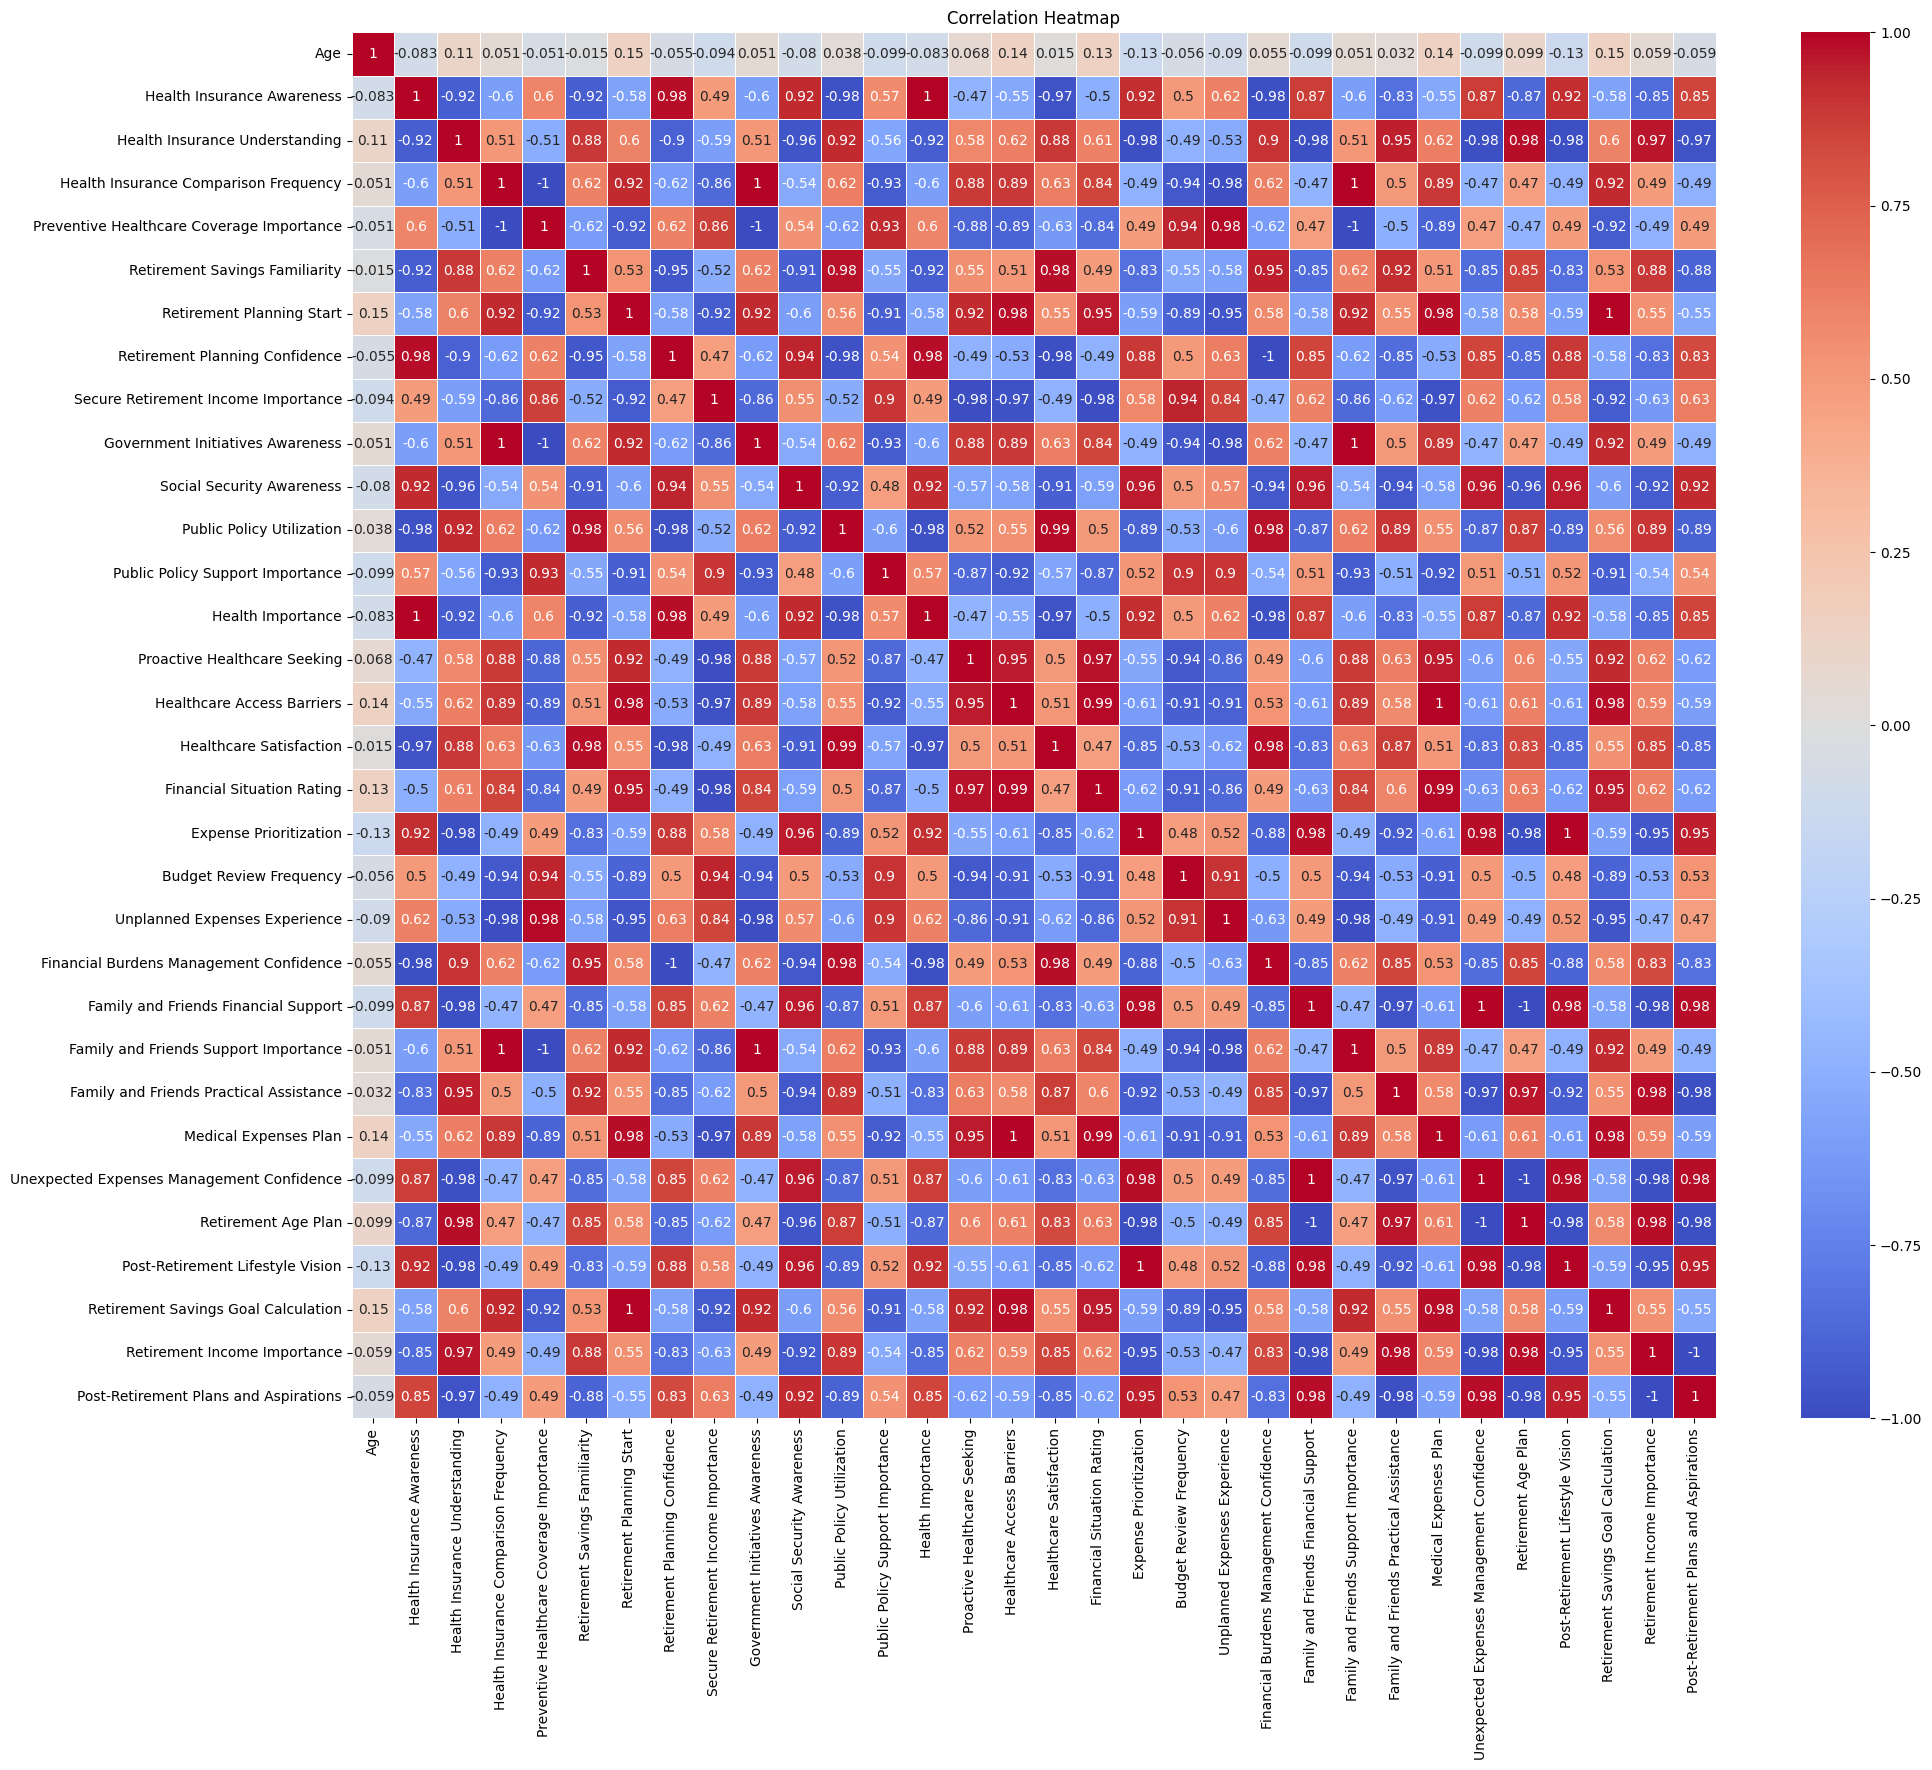

In [ ]:
# Generating a heatmap to visualize the correlation matrix
plt.figure(figsize=(22, 18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-19-de1618003e46>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[df.corr() > 0.7], annot=True, cmap='YlGnBu', linewidths=.5)


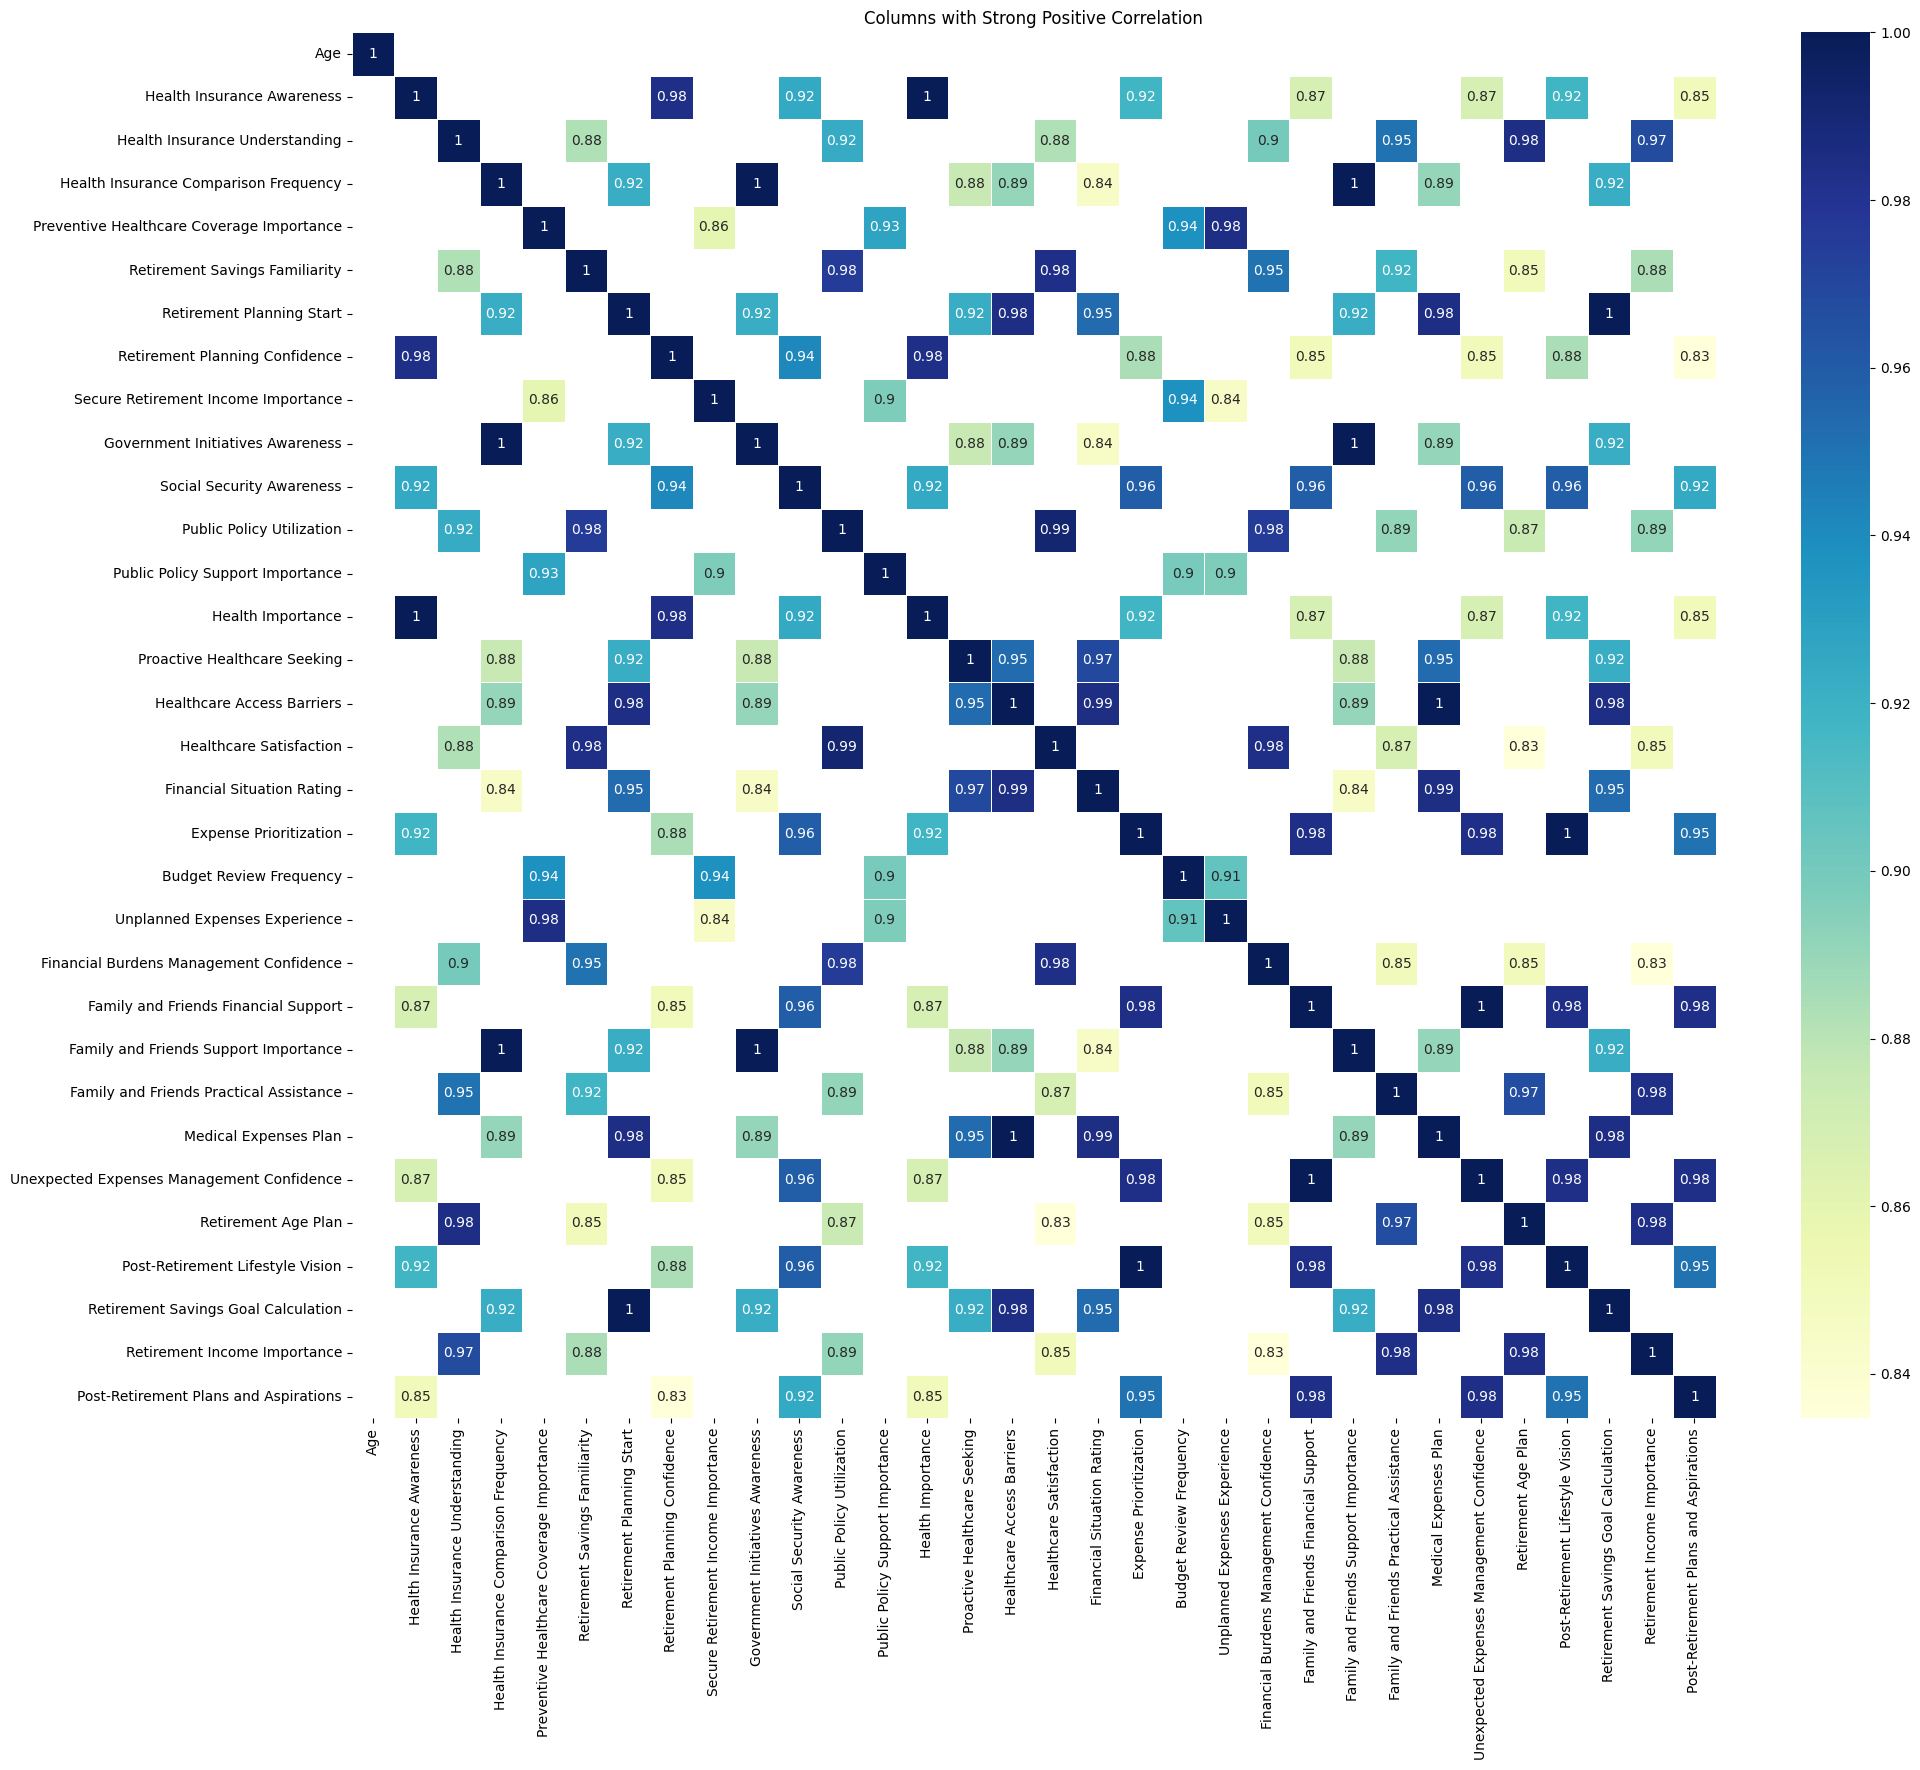

In [ ]:
# Generating a heatmap to visualize columns with strong positive correlation
plt.figure(figsize=(22, 18))
sns.heatmap(df.corr()[df.corr() > 0.7], annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Columns with Strong Positive Correlation')
plt.show()

<ipython-input-20-2d7ca409a2bc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[df.corr() < -0.7], annot=True, cmap='YlOrRd', linewidths=.5)


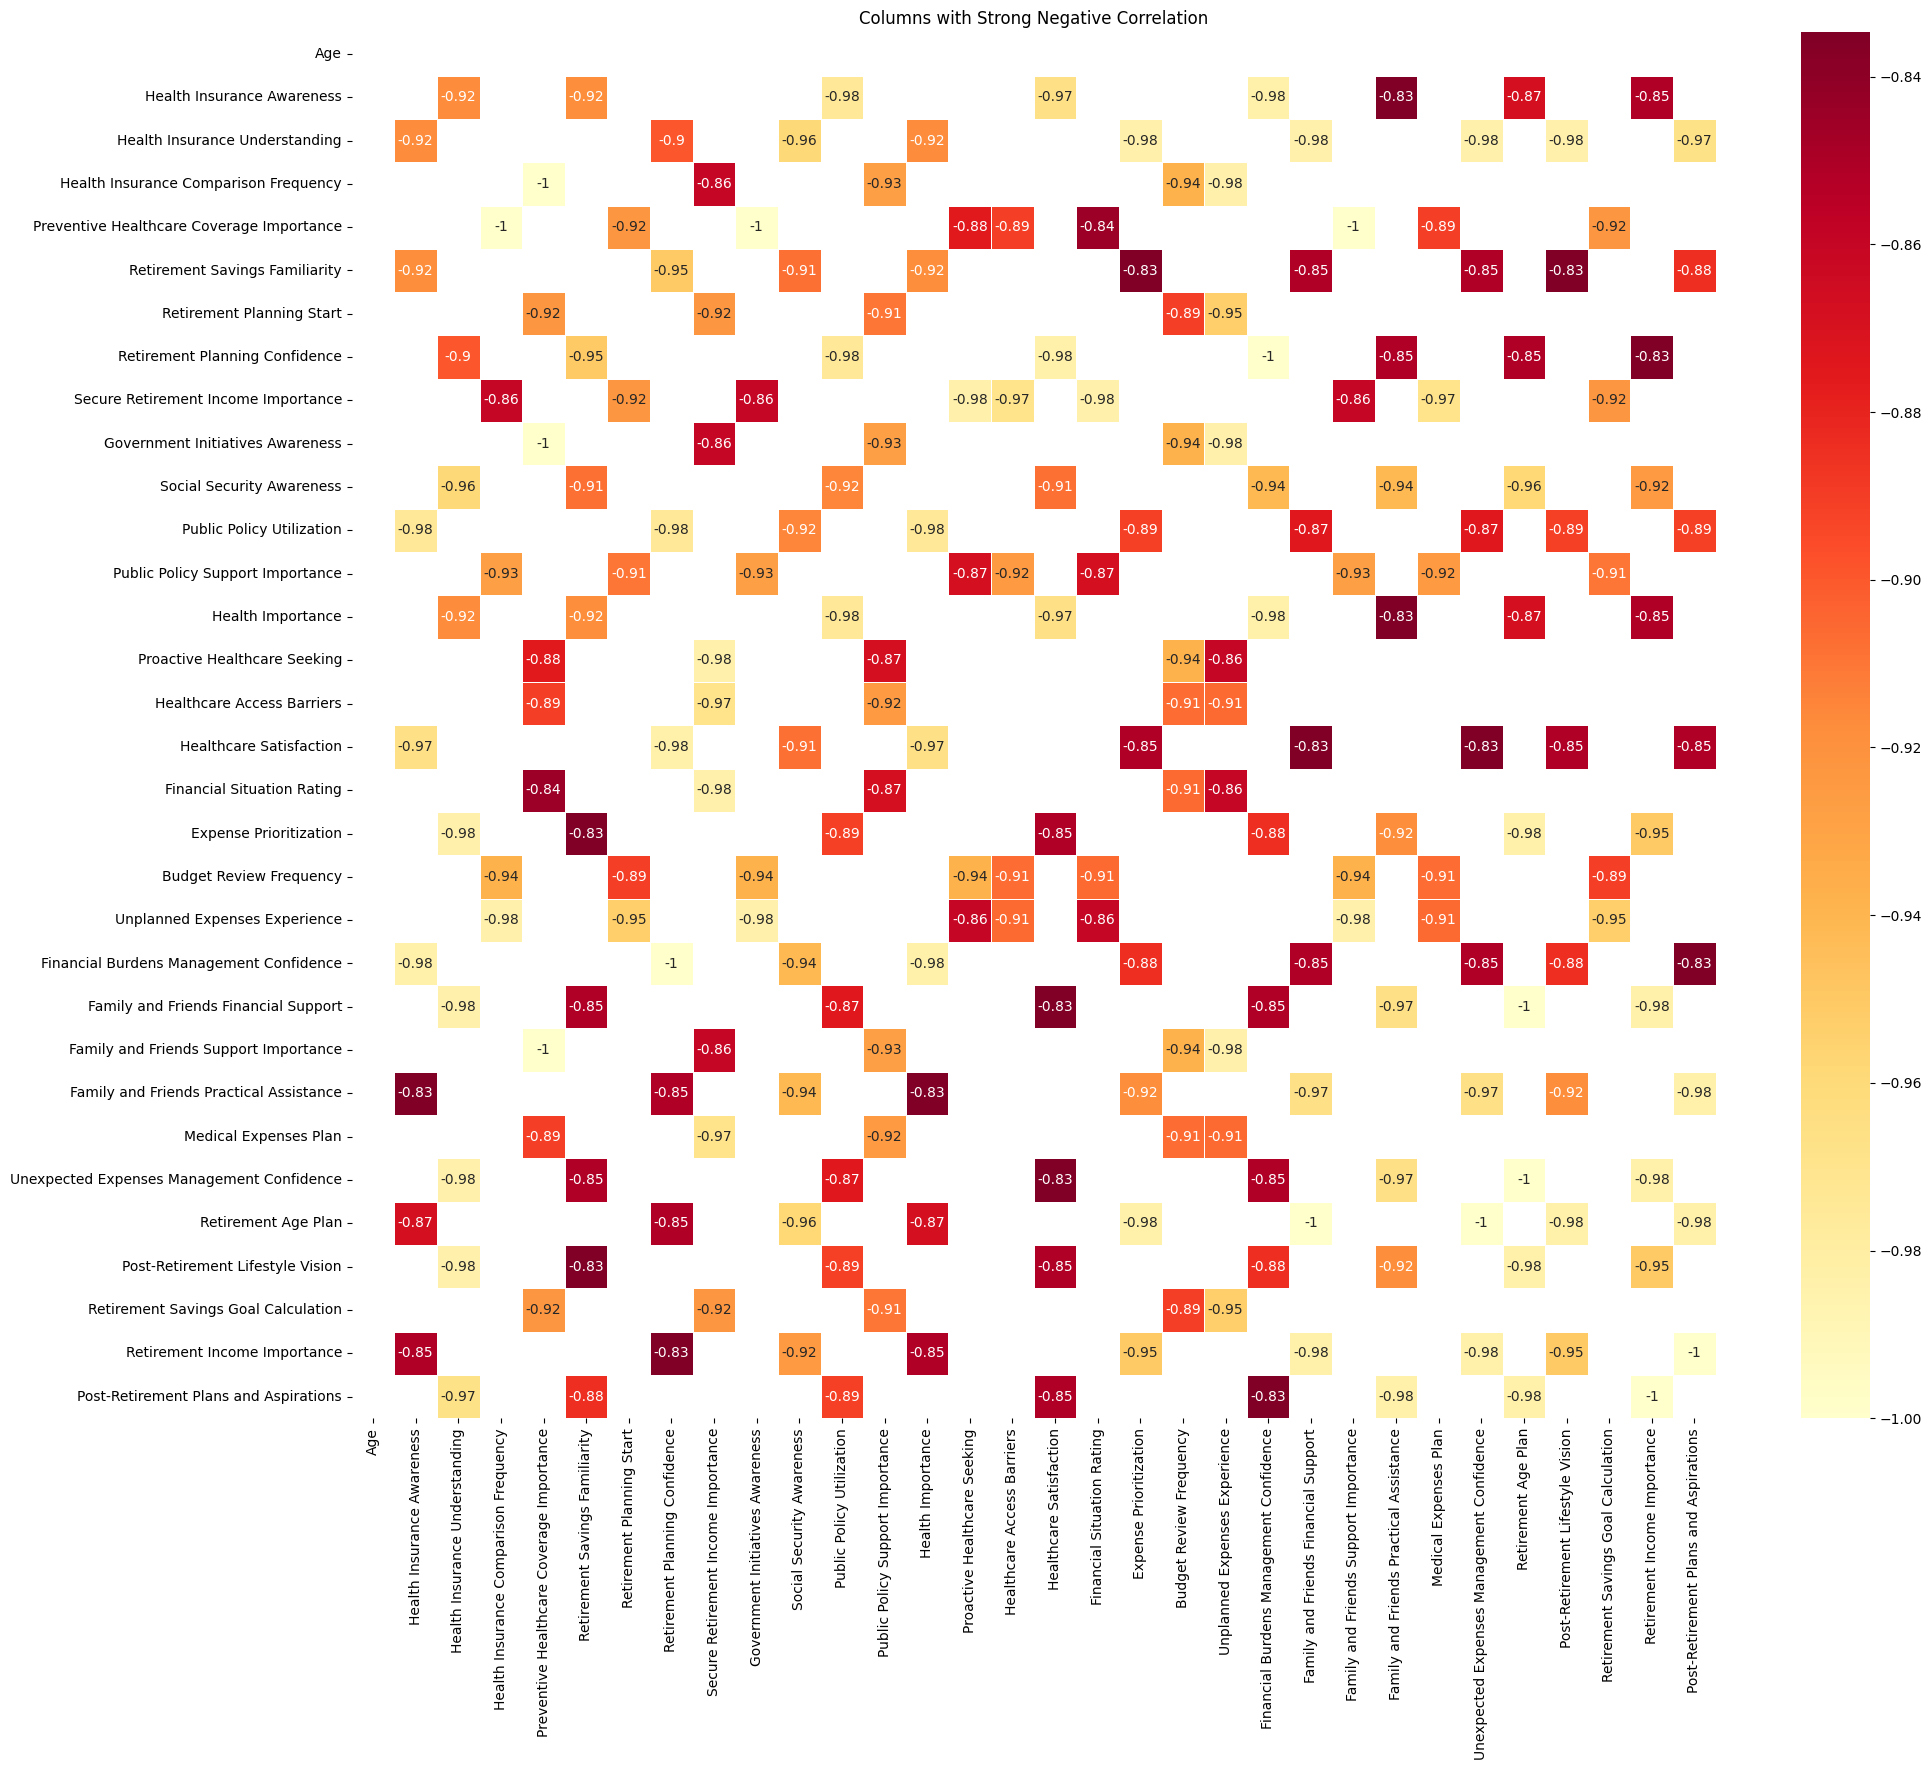

In [ ]:
# Generating a heatmap to visualize columns with strong negative correlation
plt.figure(figsize=(22, 18))
sns.heatmap(df.corr()[df.corr() < -0.7], annot=True, cmap='YlOrRd', linewidths=.5)
plt.title('Columns with Strong Negative Correlation')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the independent variables (features) and dependent variable (target)
X = df[['Age',
 'Health Insurance Awareness',
 'Health Insurance Understanding',
 'Health Insurance Comparison Frequency',
 'Preventive Healthcare Coverage Importance',
 'Retirement Savings Familiarity',
 'Retirement Planning Start',
 'Retirement Planning Confidence',
 'Secure Retirement Income Importance',
 'Government Initiatives Awareness',
 'Social Security Awareness',
 'Public Policy Utilization',
 'Public Policy Support Importance',
 'Health Importance',
 'Proactive Healthcare Seeking',
 'Healthcare Access Barriers',
 'Healthcare Satisfaction',
 'Financial Situation Rating',
 'Expense Prioritization',
 'Budget Review Frequency',
 'Unplanned Expenses Experience',
 'Financial Burdens Management Confidence',
 'Family and Friends Financial Support',
 'Family and Friends Support Importance',
 'Family and Friends Practical Assistance',
 'Medical Expenses Plan',
 'Unexpected Expenses Management Confidence',
 'Retirement Age Plan',
 'Post-Retirement Lifestyle Vision',
 'Retirement Savings Goal Calculation',
 'Retirement Income Importance']]

y = df['Post-Retirement Lifestyle Vision']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fit the linear regression model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_1.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.061289875207887055
R-squared: 0.9505726812839621


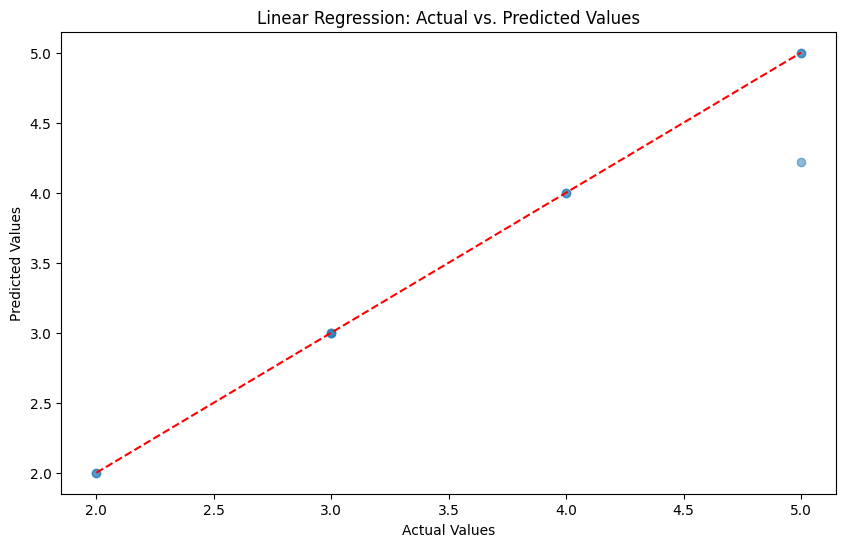

In [ ]:
# Visualizing the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Plotting the regression line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.show()

In [ ]:
# Selecting the independent variables (features) and dependent variable (target)
X = df[['Age',
 'Health Insurance Awareness',
 'Health Insurance Understanding',
 'Health Insurance Comparison Frequency',
 'Preventive Healthcare Coverage Importance',
 'Retirement Savings Familiarity',
 'Retirement Planning Start',
 'Retirement Planning Confidence',
 'Secure Retirement Income Importance',
 'Government Initiatives Awareness',
 'Social Security Awareness',
 'Public Policy Utilization',
 'Public Policy Support Importance',
 'Health Importance',
 'Proactive Healthcare Seeking',
 'Healthcare Access Barriers',
 'Healthcare Satisfaction',
 'Financial Situation Rating',
 'Expense Prioritization',
 'Budget Review Frequency',
 'Unplanned Expenses Experience',
 'Financial Burdens Management Confidence',
 'Family and Friends Financial Support',
 'Family and Friends Support Importance',
 'Family and Friends Practical Assistance',
 'Medical Expenses Plan',
 'Unexpected Expenses Management Confidence',
 'Retirement Age Plan',
 'Post-Retirement Lifestyle Vision',
 'Retirement Savings Goal Calculation',
 'Retirement Income Importance']]

y = df['Retirement Income Importance']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fit the linear regression model
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_2.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.006577765670693347
R-squared: 0.9937354612660063


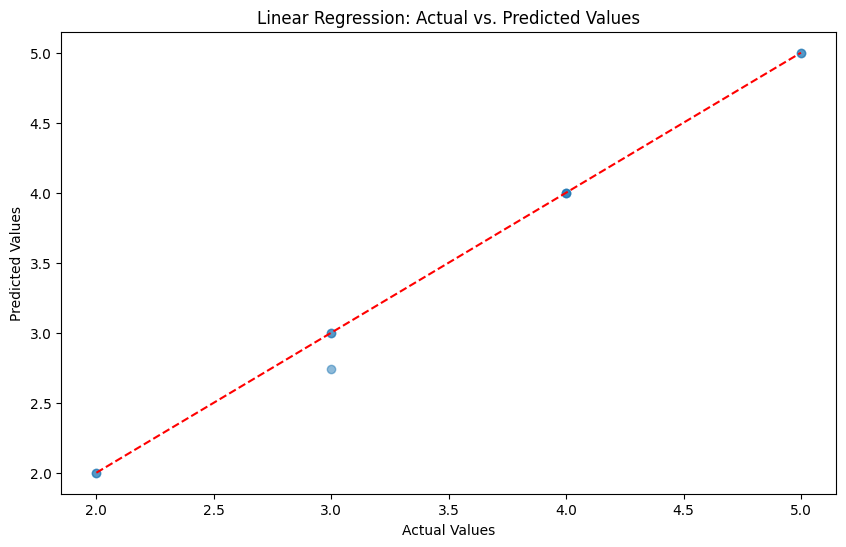

In [ ]:
# Visualizing the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Plotting the regression line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.show()

In [ ]:
# Selecting the independent variables (features) and dependent variable (target)
X = df[['Age',
 'Health Insurance Awareness',
 'Health Insurance Understanding',
 'Health Insurance Comparison Frequency',
 'Preventive Healthcare Coverage Importance',
 'Retirement Savings Familiarity',
 'Retirement Planning Start',
 'Retirement Planning Confidence',
 'Secure Retirement Income Importance',
 'Government Initiatives Awareness',
 'Social Security Awareness',
 'Public Policy Utilization',
 'Public Policy Support Importance',
 'Health Importance',
 'Proactive Healthcare Seeking',
 'Healthcare Access Barriers',
 'Healthcare Satisfaction',
 'Financial Situation Rating',
 'Expense Prioritization',
 'Budget Review Frequency',
 'Unplanned Expenses Experience',
 'Financial Burdens Management Confidence',
 'Family and Friends Financial Support',
 'Family and Friends Support Importance',
 'Family and Friends Practical Assistance',
 'Medical Expenses Plan',
 'Unexpected Expenses Management Confidence',
 'Retirement Age Plan',
 'Post-Retirement Lifestyle Vision',
 'Retirement Savings Goal Calculation',
 'Retirement Income Importance']]

y = df['Financial Situation Rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fit the linear regression model
model_3 = LinearRegression()
model_3.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_3.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.12332062271531749
R-squared: 0.9149512946790914


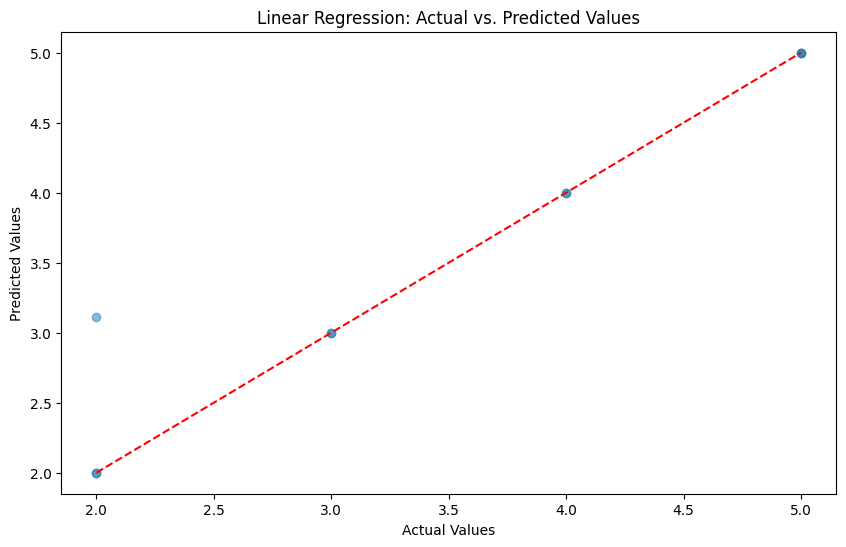

In [ ]:
# Visualizing the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Plotting the regression line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.show()

In [ ]:
# Selecting the independent variables (features) and dependent variable (target)
X = df[['Age',
 'Health Insurance Awareness',
 'Health Insurance Understanding',
 'Health Insurance Comparison Frequency',
 'Preventive Healthcare Coverage Importance',
 'Retirement Savings Familiarity',
 'Retirement Planning Start',
 'Retirement Planning Confidence',
 'Secure Retirement Income Importance',
 'Government Initiatives Awareness',
 'Social Security Awareness',
 'Public Policy Utilization',
 'Public Policy Support Importance',
 'Health Importance',
 'Proactive Healthcare Seeking',
 'Healthcare Access Barriers',
 'Healthcare Satisfaction',
 'Financial Situation Rating',
 'Expense Prioritization',
 'Budget Review Frequency',
 'Unplanned Expenses Experience',
 'Financial Burdens Management Confidence',
 'Family and Friends Financial Support',
 'Family and Friends Support Importance',
 'Family and Friends Practical Assistance',
 'Medical Expenses Plan',
 'Unexpected Expenses Management Confidence',
 'Retirement Age Plan',
 'Post-Retirement Lifestyle Vision',
 'Retirement Savings Goal Calculation',
 'Retirement Income Importance']]

y = df['Preventive Healthcare Coverage Importance']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fit the linear regression model
model_4 = LinearRegression()
model_4.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_4.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0017103419513078849
R-squared: 0.9987423956240383


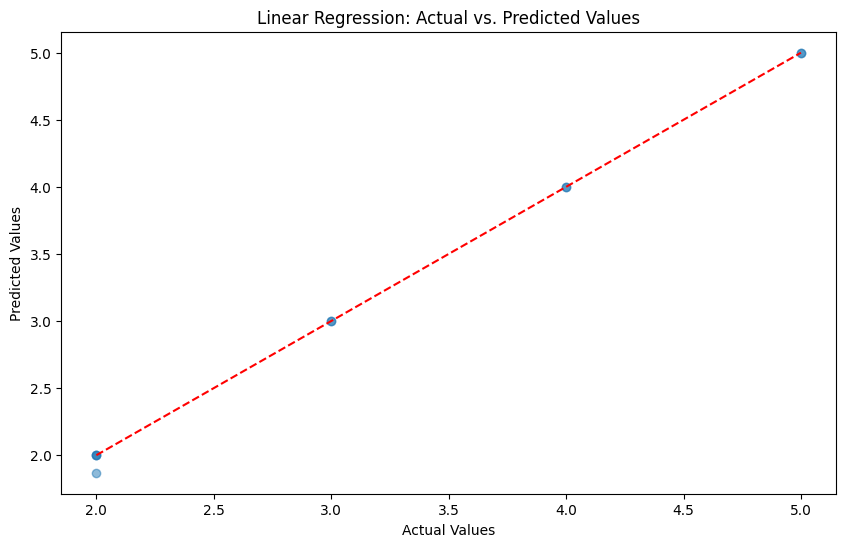

In [ ]:
# Visualizing the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Plotting the regression line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.show()

# Using SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Age',
 'Health Insurance Awareness',
 'Health Insurance Understanding',
 'Health Insurance Comparison Frequency',
 'Preventive Healthcare Coverage Importance',
 'Retirement Savings Familiarity',
 'Retirement Planning Start',
 'Retirement Planning Confidence',
 'Secure Retirement Income Importance',
 'Government Initiatives Awareness',
 'Social Security Awareness',
 'Public Policy Utilization',
 'Public Policy Support Importance',
 'Health Importance',
 'Proactive Healthcare Seeking',
 'Healthcare Access Barriers',
 'Healthcare Satisfaction',
 'Financial Situation Rating',
 'Expense Prioritization',
 'Budget Review Frequency',
 'Unplanned Expenses Experience',
 'Financial Burdens Management Confidence',
 'Family and Friends Financial Support',
 'Family and Friends Support Importance',
 'Family and Friends Practical Assistance',
 'Medical Expenses Plan',
 'Unexpected Expenses Management Confidence',
 'Retirement Age Plan',
 'Post-Retirement Lifestyle Vision',
 'Retirement Savings Goal Calculation',
 'Retirement Income Importance']]

y = df['Preventive Healthcare Coverage Importance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_svm = SVR(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred)
r2_svm = r2_score(y_test, y_pred)

print(f'Mean Squared Error (SVM): {mse_svm}')
print(f'R-squared (SVM): {r2_svm}')

Mean Squared Error (SVM): 0.014436383157389704
R-squared (SVM): 0.9893850123842722


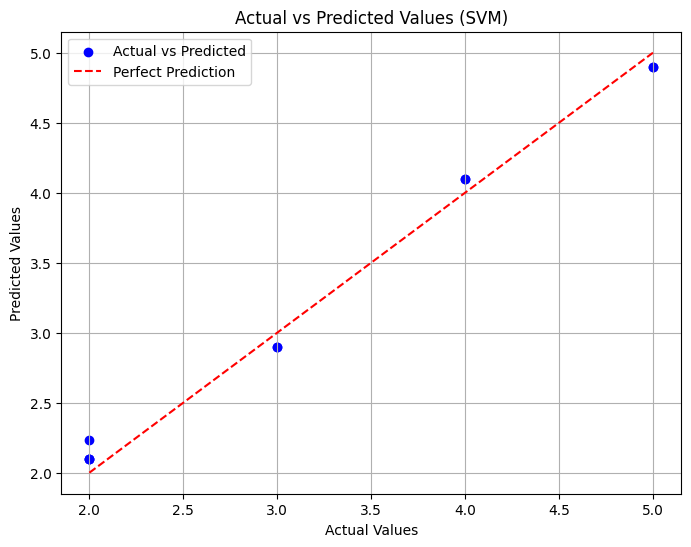

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (SVM)')
plt.legend()
plt.grid(True)
plt.show()

# Using Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Squared Error (LR): 0.014436383157389704
R-squared (LR): 0.9893850123842722


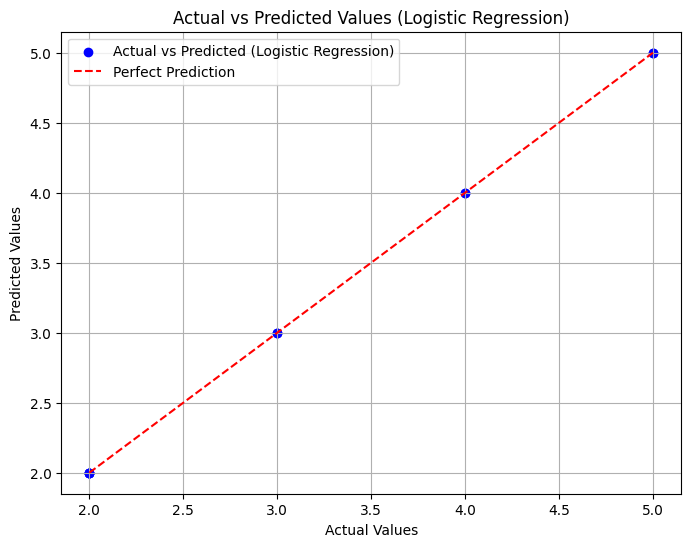

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Age',
 'Health Insurance Awareness',
 'Health Insurance Understanding',
 'Health Insurance Comparison Frequency',
 'Preventive Healthcare Coverage Importance',
 'Retirement Savings Familiarity',
 'Retirement Planning Start',
 'Retirement Planning Confidence',
 'Secure Retirement Income Importance',
 'Government Initiatives Awareness',
 'Social Security Awareness',
 'Public Policy Utilization',
 'Public Policy Support Importance',
 'Health Importance',
 'Proactive Healthcare Seeking',
 'Healthcare Access Barriers',
 'Healthcare Satisfaction',
 'Financial Situation Rating',
 'Expense Prioritization',
 'Budget Review Frequency',
 'Unplanned Expenses Experience',
 'Financial Burdens Management Confidence',
 'Family and Friends Financial Support',
 'Family and Friends Support Importance',
 'Family and Friends Practical Assistance',
 'Medical Expenses Plan',
 'Unexpected Expenses Management Confidence',
 'Retirement Age Plan',
 'Post-Retirement Lifestyle Vision',
 'Retirement Savings Goal Calculation',
 'Retirement Income Importance']]

y = df['Preventive Healthcare Coverage Importance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print(f'Mean Squared Error (LR): {mse_lr}')
print(f'R-squared (LR): {r2_lr}')

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Actual vs Predicted (Logistic Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Using KNN

Mean Squared Error (LR): 0.014436383157389704
R-squared (LR): 0.9893850123842722


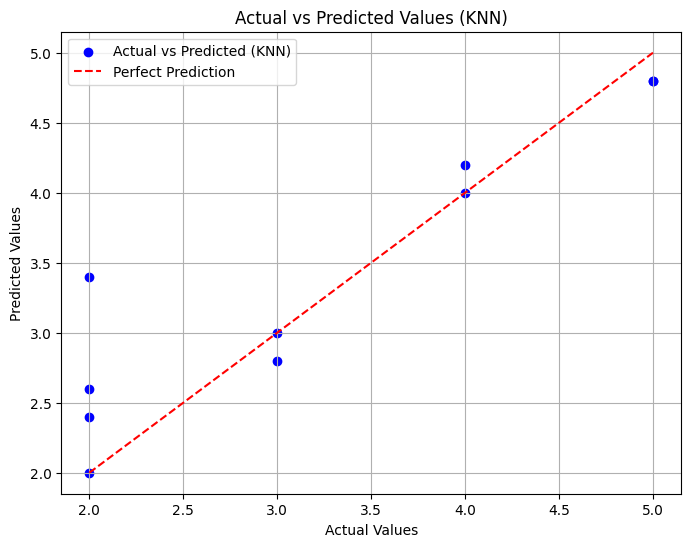

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Age',
 'Health Insurance Awareness',
 'Health Insurance Understanding',
 'Health Insurance Comparison Frequency',
 'Preventive Healthcare Coverage Importance',
 'Retirement Savings Familiarity',
 'Retirement Planning Start',
 'Retirement Planning Confidence',
 'Secure Retirement Income Importance',
 'Government Initiatives Awareness',
 'Social Security Awareness',
 'Public Policy Utilization',
 'Public Policy Support Importance',
 'Health Importance',
 'Proactive Healthcare Seeking',
 'Healthcare Access Barriers',
 'Healthcare Satisfaction',
 'Financial Situation Rating',
 'Expense Prioritization',
 'Budget Review Frequency',
 'Unplanned Expenses Experience',
 'Financial Burdens Management Confidence',
 'Family and Friends Financial Support',
 'Family and Friends Support Importance',
 'Family and Friends Practical Assistance',
 'Medical Expenses Plan',
 'Unexpected Expenses Management Confidence',
 'Retirement Age Plan',
 'Post-Retirement Lifestyle Vision',
 'Retirement Savings Goal Calculation',
 'Retirement Income Importance']]

y = df['Preventive Healthcare Coverage Importance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_knn = KNeighborsRegressor(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)

print(f'Mean Squared Error (LR): {mse_knn}')
print(f'R-squared (LR): {r2_knn}')

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', label='Actual vs Predicted (KNN)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (KNN)')
plt.legend()
plt.grid(True)
plt.show()


# Using Decision Tree

Mean Squared Error (LR): 0.014436383157389704
R-squared (LR): 0.9893850123842722


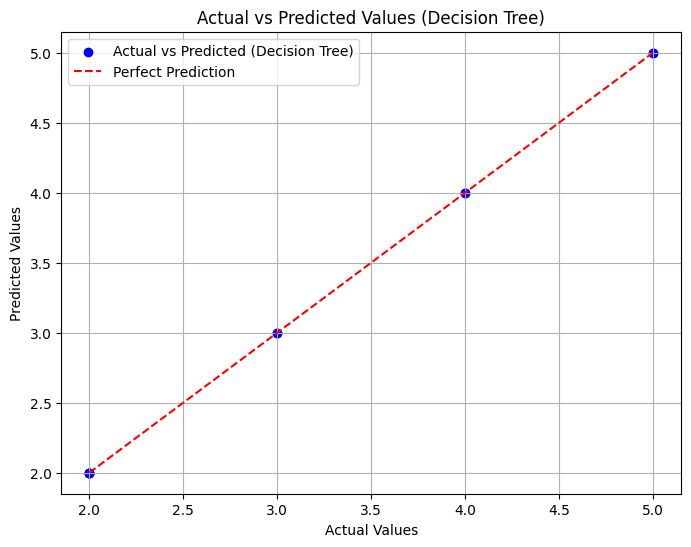

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Age',
 'Health Insurance Awareness',
 'Health Insurance Understanding',
 'Health Insurance Comparison Frequency',
 'Preventive Healthcare Coverage Importance',
 'Retirement Savings Familiarity',
 'Retirement Planning Start',
 'Retirement Planning Confidence',
 'Secure Retirement Income Importance',
 'Government Initiatives Awareness',
 'Social Security Awareness',
 'Public Policy Utilization',
 'Public Policy Support Importance',
 'Health Importance',
 'Proactive Healthcare Seeking',
 'Healthcare Access Barriers',
 'Healthcare Satisfaction',
 'Financial Situation Rating',
 'Expense Prioritization',
 'Budget Review Frequency',
 'Unplanned Expenses Experience',
 'Financial Burdens Management Confidence',
 'Family and Friends Financial Support',
 'Family and Friends Support Importance',
 'Family and Friends Practical Assistance',
 'Medical Expenses Plan',
 'Unexpected Expenses Management Confidence',
 'Retirement Age Plan',
 'Post-Retirement Lifestyle Vision',
 'Retirement Savings Goal Calculation',
 'Retirement Income Importance']]

y = df['Preventive Healthcare Coverage Importance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_dt = DecisionTreeRegressor(max_depth=5)  # You can adjust the max_depth parameter as needed
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)

print(f'Mean Squared Error (LR): {mse_dt}')
print(f'R-squared (LR): {r2_dt}')

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='blue', label='Actual vs Predicted (Decision Tree)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Read the Excel file into a pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/Response.xlsx')

# Displaying the first few rows of the DataFrame
df.head()

,Name,Age,Annual Income,Annual Savings,Place of origin,Gender,Highest Education,How aware are you of the different health insurance plans available in the market?,To what extent do you understand the coverage and benefits offered by health insurance plans?,How often do you compare different health insurance plans before making a decision?,...,How supportive do you find your family and friends in financial matters?,How important is moral and emotional support from your family and friends?,"Have you received practical assistance (e.g., loans, gifts) from family or friends during financial difficulties?",Do you have a dedicated plan or strategy in place to cover unexpected medical expenses?,"How confident are you in your ability to handle other unexpected expenses (e.g., car repairs, home maintenance)?",What age do you plan to retire at?,How do you envision your lifestyle after retirement?,Have you calculated your retirement savings goal based on your expected post-retirement lifestyle?,How important is it for you to have a retirement income that covers your desired lifestyle?,Do you have any specific plans or aspirations for activities or projects post-retirement?
0,Akshay,35,5-7 LPA,30-50%,Odisha,Male,Undergraduate,4,3,2,...,4,2,3,2,4,3,4,2,3,4
1,Priya,47,0-5 LPA,0-10%,Maharashtra,Female,Postgraduate,3,4,5,...,3,5,4,5,3,4,3,5,4,3
2,Somnath,33,15 LPA & above,More than 70%,Karnataka,Male,Non-graduate,5,2,3,...,5,3,2,3,5,2,5,3,2,5
3,Nisha,52,7-10 LPA,10-30%,Delhi,Female,Doctorate and above,2,5,4,...,2,4,5,4,2,5,2,4,5,2
4,Rohit,38,10-15 LPA,30-50%,Bihar,Male,Undergraduate,4,3,2,...,4,2,3,2,4,3,4,2,3,4


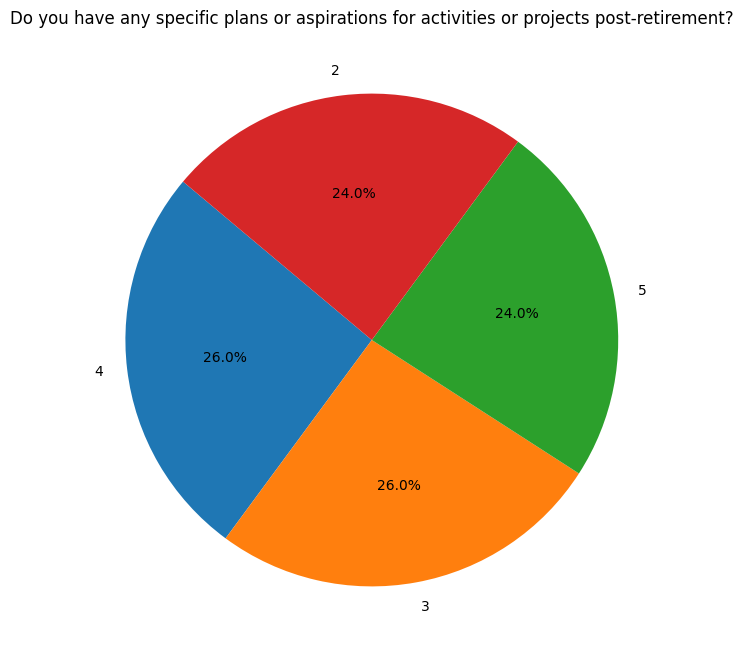

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Do you have any specific plans or aspirations for activities or projects post-retirement?'].value_counts(),
        labels=df['Do you have any specific plans or aspirations for activities or projects post-retirement?'].value_counts().index,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Do you have any specific plans or aspirations for activities or projects post-retirement?')
plt.show()